In [49]:
from data import Data
from dimension_reduction import PCADimensionReduction
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import balanced_accuracy_score, roc_auc_score
from imblearn.ensemble import BalancedRandomForestClassifier
import shap

In [29]:
# You can test the other datasets by changing these file names
data_filepath = "data/SC_integration/counts_ctc_simulated_123_5k.tsv"
true_results_filepath = "data/SC_integration/ids_ctc_simulated_123_5k.tsv"
train_indices_filepath = "data/SC_integration/train_indices.npy"
test_indices_filepath = "data/SC_integration/test_indices.npy"
SEED = 42
FOLD_NUMBER = 3

# You can change these values to work better for models
CUT_BY_MAX_THRESHOLD = 4
PCA_VARIABLES_AMOUNT = 60

# There are 4 data variants to check: regular, scaled, cut by max, pca reduced + cut by max
data_object = Data(data_filepath, true_results_filepath)
#data_object.generate_train_test_split() #generate train and test split indices' files in the main folder
train_data, test_data, train_true_results, test_true_results =  data_object.load_train_test_split(train_indices_filepath, test_indices_filepath)
scaled_train_data, scaled_test_data = data_object.get_scaled_train_test_data()

In [30]:
cut_by_max_train_data, cut_by_max_test_data = data_object.get_cut_by_max_train_test_data(CUT_BY_MAX_THRESHOLD)

pca_object = PCADimensionReduction(cut_by_max_train_data, scaled_train_data, train_true_results, SEED)
pca_variables = pca_object.get_most_important_variables_from_pc1(PCA_VARIABLES_AMOUNT)
pca_reduced_train_data = cut_by_max_train_data[pca_variables.index]
pca_reduced_test_data = cut_by_max_test_data[pca_variables.index]

## Random Forest

### Regular data

In [31]:
classifier = RandomForestClassifier(random_state=SEED, n_estimators=2000, criterion="log_loss")
classifier.fit(train_data, train_true_results.values.ravel())
print("Test Balanced Accuracy", balanced_accuracy_score(test_true_results, classifier.predict(test_data)))
print("Test AUC", roc_auc_score(test_true_results, classifier.predict(test_data)))

Test Balanced Accuracy 1.0
Test AUC 1.0


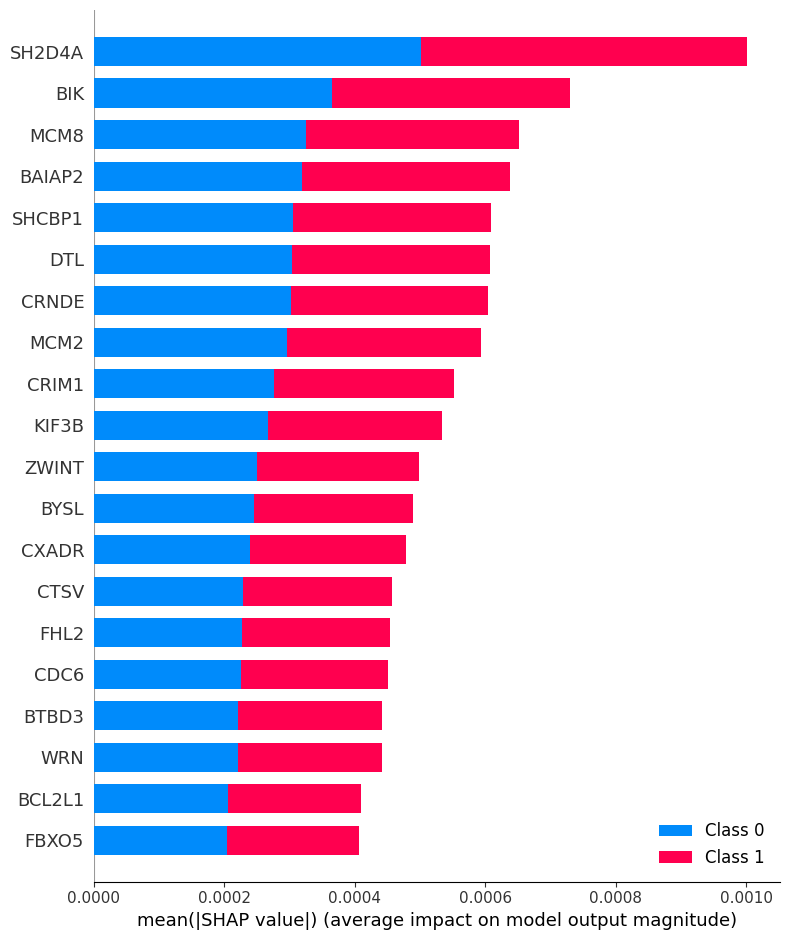

In [32]:
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(train_data)
shap.summary_plot(shap_values, train_data, plot_type="bar")

### Scaled data

In [33]:
classifier = RandomForestClassifier(random_state=SEED, n_estimators=2000, criterion="log_loss")
classifier.fit(scaled_train_data, train_true_results.values.ravel())
print("Test Balanced Accuracy", balanced_accuracy_score(test_true_results, classifier.predict(scaled_test_data)))
print("Test AUC", roc_auc_score(test_true_results, classifier.predict(scaled_test_data)))

Test Balanced Accuracy 1.0
Test AUC 1.0


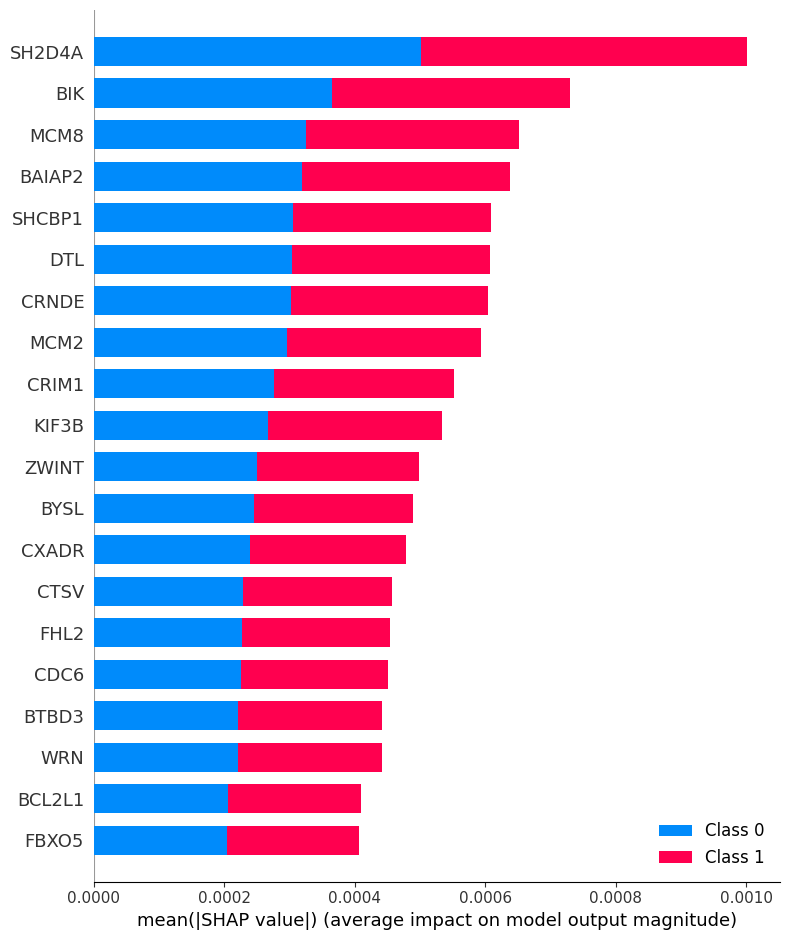

In [34]:
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(scaled_train_data)
shap.summary_plot(shap_values, scaled_train_data, plot_type="bar")

### Cut by max data

In [35]:
classifier = RandomForestClassifier(random_state=SEED, n_estimators=2000, criterion="log_loss")
classifier.fit(cut_by_max_train_data, train_true_results.values.ravel())
print("Test Balanced Accuracy", balanced_accuracy_score(test_true_results, classifier.predict(cut_by_max_test_data)))
print("Test AUC", roc_auc_score(test_true_results, classifier.predict(cut_by_max_test_data)))

Test Balanced Accuracy 0.9666666666666667
Test AUC 0.9666666666666667


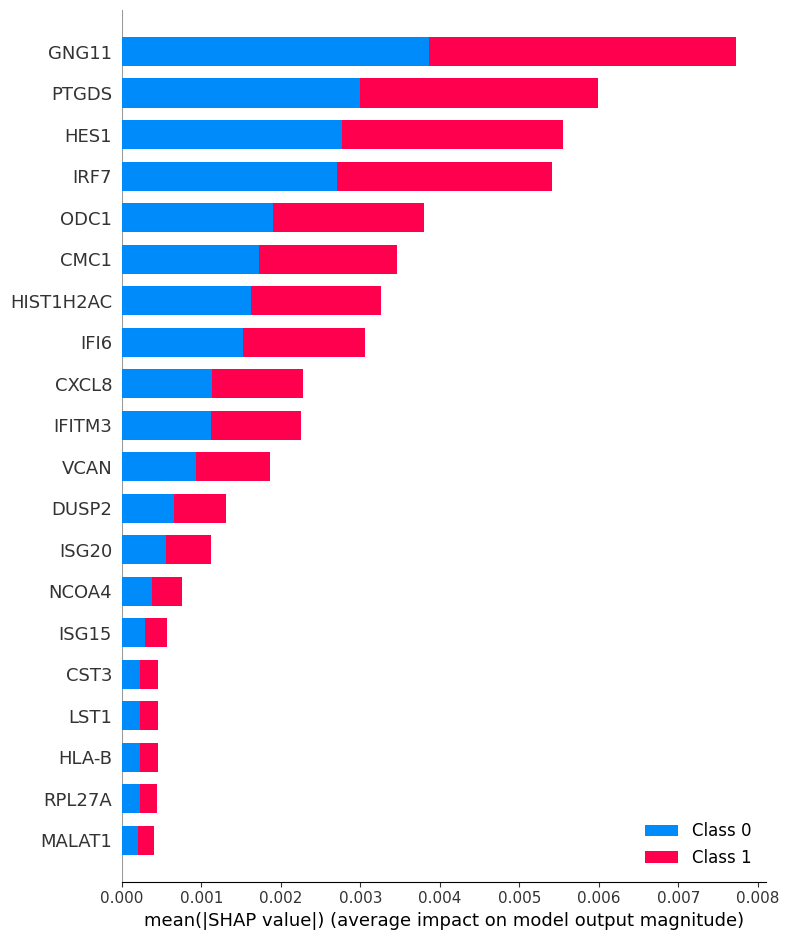

In [36]:
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(cut_by_max_train_data)
shap.summary_plot(shap_values, cut_by_max_train_data, plot_type="bar")

### Pca reduced + cut by max data

In [37]:
classifier = RandomForestClassifier(random_state=SEED, n_estimators=2000, criterion="log_loss")
classifier.fit(pca_reduced_train_data, train_true_results.values.ravel())
print("Test Balanced Accuracy", balanced_accuracy_score(test_true_results, classifier.predict(pca_reduced_test_data)))
print("Test AUC", roc_auc_score(test_true_results, classifier.predict(pca_reduced_test_data)))

Test Balanced Accuracy 1.0
Test AUC 1.0


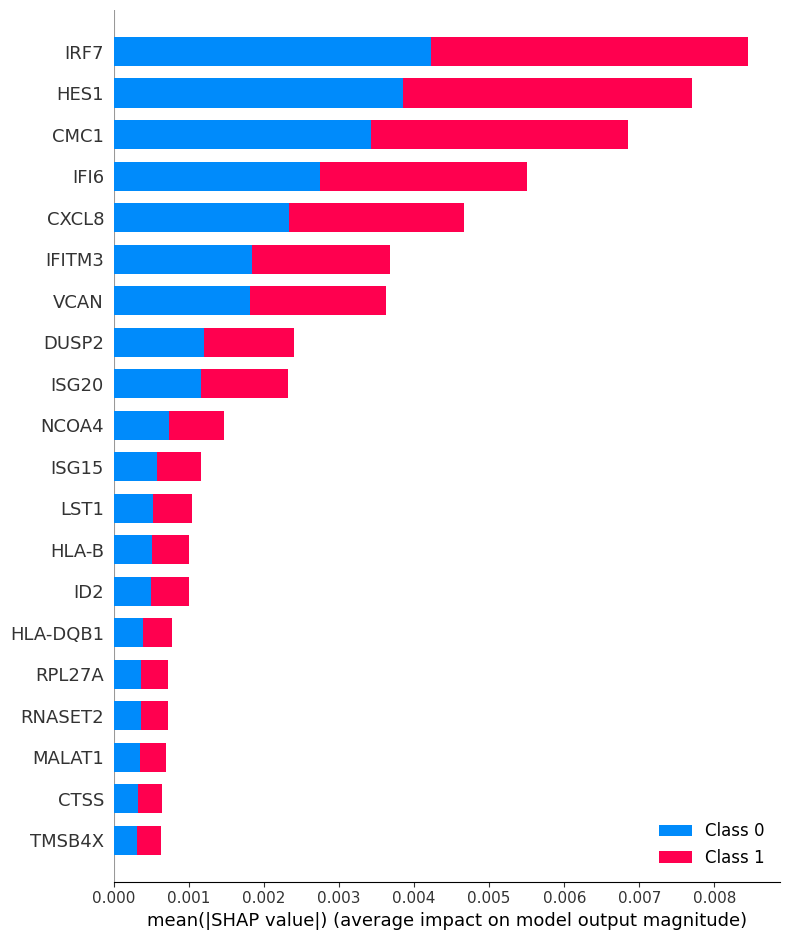

In [38]:
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(pca_reduced_train_data)
shap.summary_plot(shap_values, pca_reduced_train_data, plot_type="bar")

## Balanced Random Forest

In [39]:
classifier = BalancedRandomForestClassifier(random_state=SEED,  n_estimators=2000)
classifier.fit(train_data, train_true_results.values.ravel())
print("Test Balanced Accuracy", balanced_accuracy_score(test_true_results, classifier.predict(test_data)))
print("Test AUC", roc_auc_score(test_true_results, classifier.predict(test_data)))

Test Balanced Accuracy 1.0
Test AUC 1.0


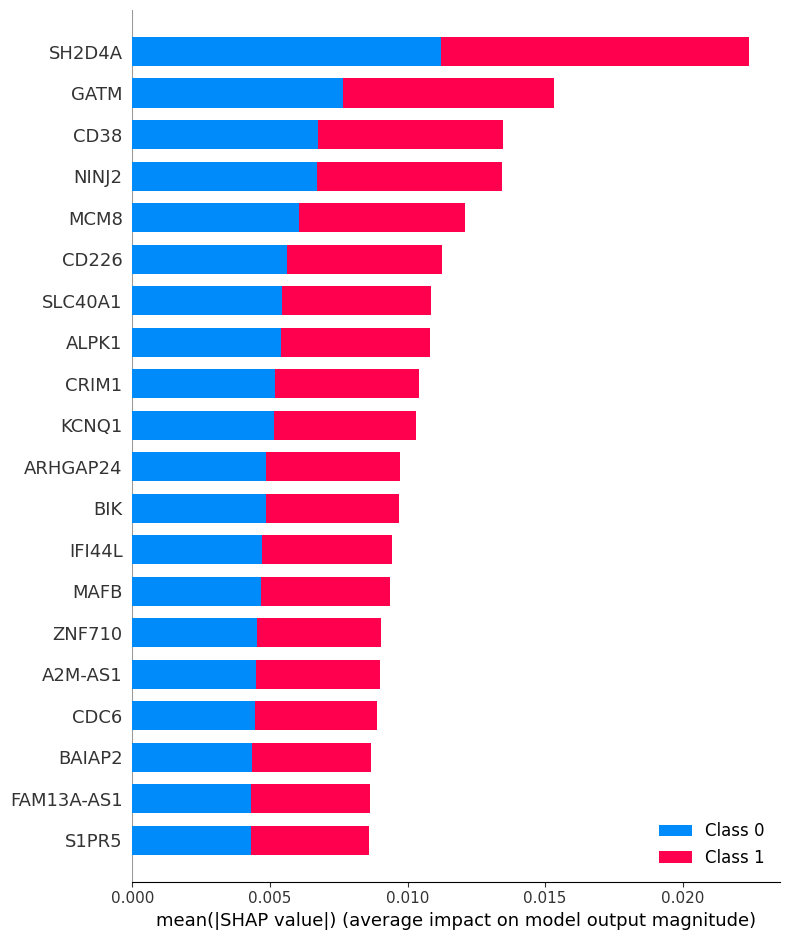

In [40]:
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(train_data)
shap.summary_plot(shap_values, train_data, plot_type="bar")

### Scaled data

In [41]:
classifier = BalancedRandomForestClassifier(random_state=SEED,  n_estimators=2000)
classifier.fit(scaled_train_data, train_true_results.values.ravel())
print("Test Balanced Accuracy", balanced_accuracy_score(test_true_results, classifier.predict(scaled_test_data)))
print("Test AUC", roc_auc_score(test_true_results, classifier.predict(scaled_test_data)))

Test Balanced Accuracy 1.0
Test AUC 1.0


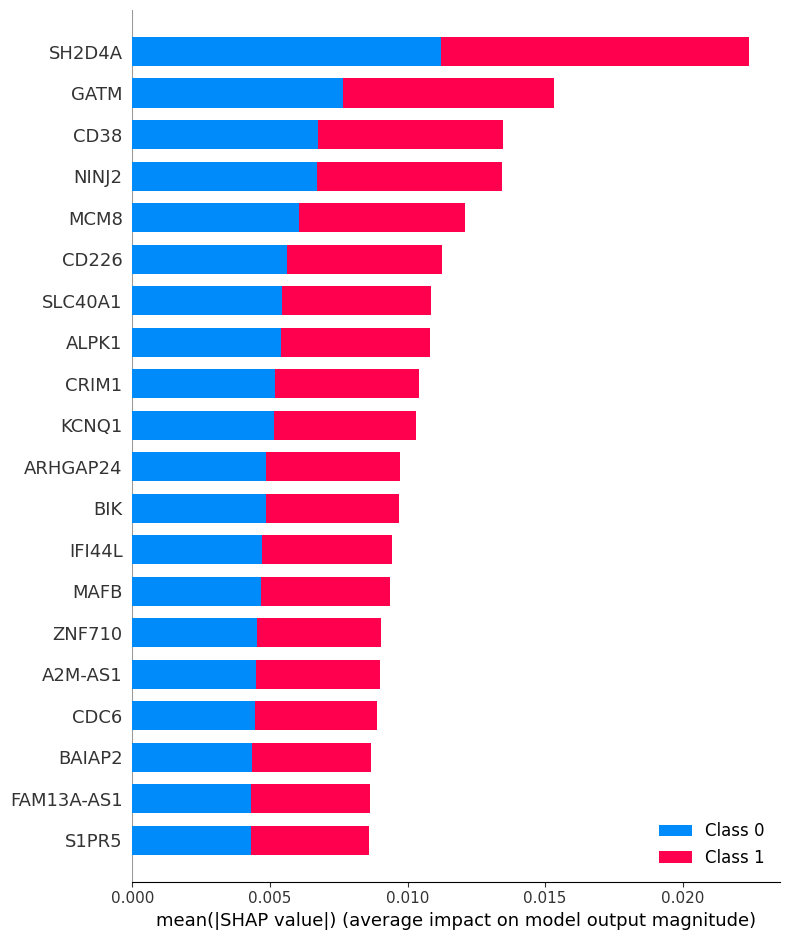

In [42]:
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(scaled_train_data)
shap.summary_plot(shap_values, scaled_train_data, plot_type="bar")

### Cut by max data

In [43]:
classifier = BalancedRandomForestClassifier(random_state=SEED,  n_estimators=2000)
classifier.fit(cut_by_max_train_data, train_true_results.values.ravel())
print("Test Balanced Accuracy", balanced_accuracy_score(test_true_results, classifier.predict(cut_by_max_test_data)))
print("Test AUC", roc_auc_score(test_true_results, classifier.predict(cut_by_max_test_data)))

Test Balanced Accuracy 0.9980813507290867
Test AUC 0.9980813507290867


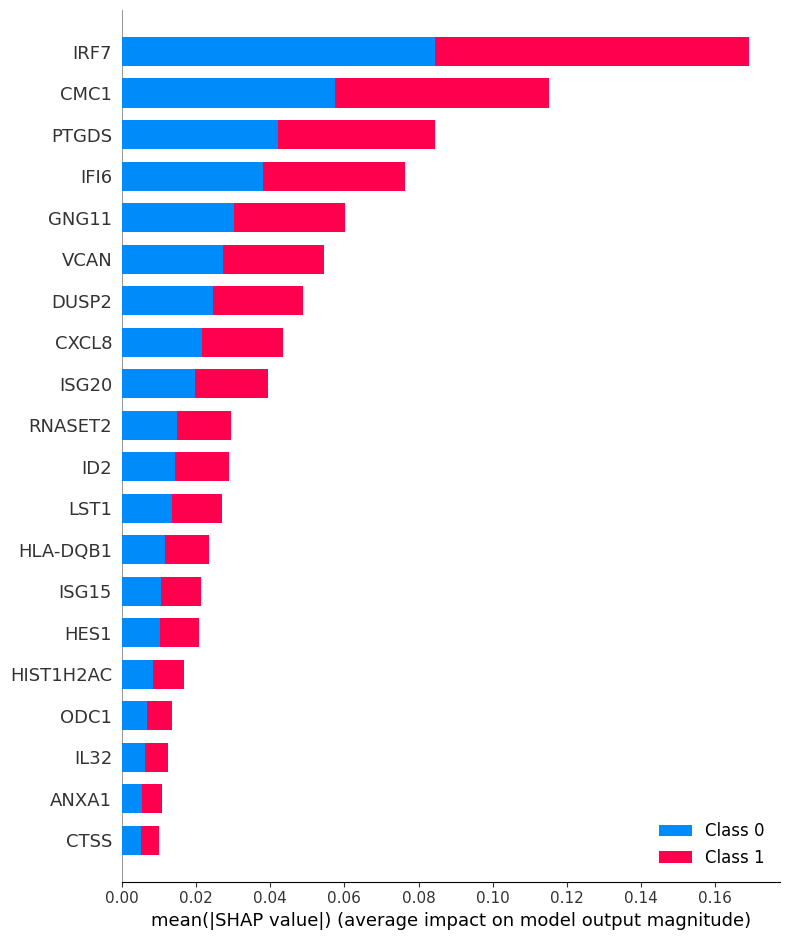

In [44]:
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(cut_by_max_train_data)
shap.summary_plot(shap_values, cut_by_max_train_data, plot_type="bar")

### Pca reduced + cut by max data

In [45]:
classifier = BalancedRandomForestClassifier(random_state=SEED,  n_estimators=2000)
classifier.fit(pca_reduced_train_data, train_true_results.values.ravel())
print("Test Balanced Accuracy", balanced_accuracy_score(test_true_results, classifier.predict(pca_reduced_test_data)))
print("Test AUC", roc_auc_score(test_true_results, classifier.predict(pca_reduced_test_data)))

Test Balanced Accuracy 0.9980813507290867
Test AUC 0.9980813507290867


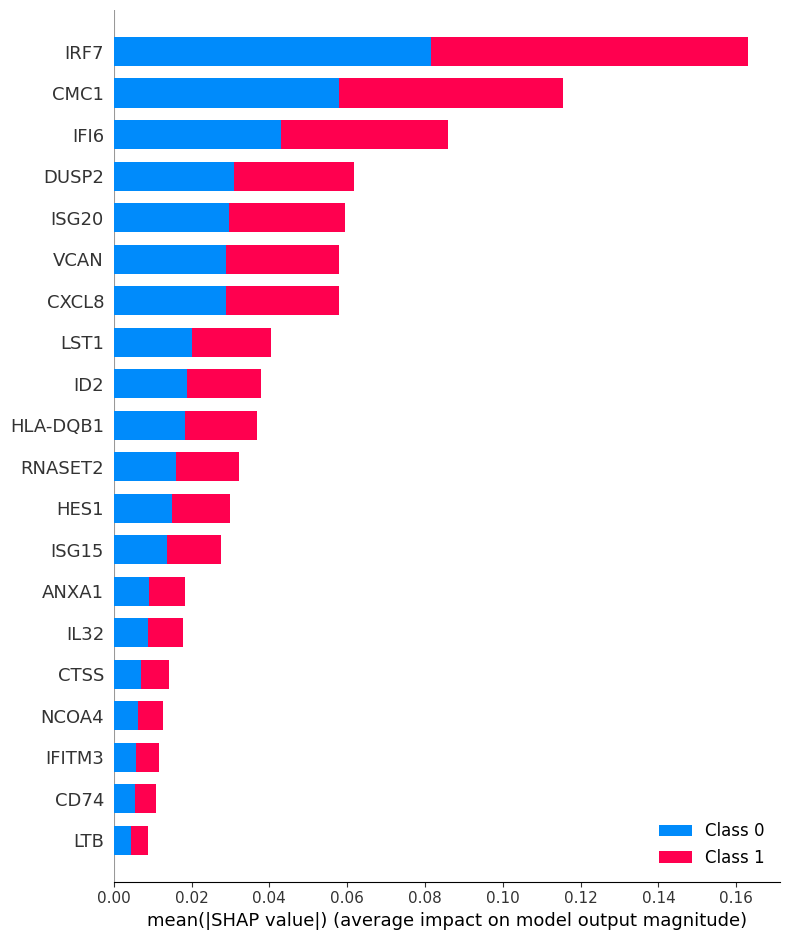

In [46]:
explainer = shap.TreeExplainer(classifier)
shap_values = explainer.shap_values(pca_reduced_train_data)
shap.summary_plot(shap_values, pca_reduced_train_data, plot_type="bar")